In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Training data exploration & Preprocessing

In [ ]:
#Load random sample from train.csv
import random

filename = 'Data\\train.csv'
n = sum(1 for line in open(filename)) - 1 #number of records in file
s = 200000 #sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
train_data = pd.read_csv(filename, skiprows=skip)
train_data.to_csv('Data\\train_data_sample.csv', index=False)

In [11]:
train_data = pd.read_csv('Data\\train_data_sample.csv')

In [12]:
#Load features.csv
features = pd.read_csv('Data\\features.csv')

In [13]:
#Load test set
test = pd.read_csv('Data\\example_test.csv')

### Training data

In [14]:
train_data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.119056,-0.005066,-0.006115,0.014734,0.019784,0.005082,1,-0.303130,-1.578560,...,NaN,5.583801,4.801788,4.647657,5.386426,6.572489,4.751286,6.170338,4.625856,26
1,0,4.826216,-0.005051,-0.005869,-0.011151,-0.011527,-0.010873,-1,-0.661124,-1.602908,...,NaN,0.325940,1.448772,0.326455,2.402899,0.459243,1.758362,0.300931,1.299309,60
2,0,0.000000,0.000810,0.002753,0.002360,-0.009204,-0.013806,1,0.277467,-0.699775,...,NaN,-0.372628,0.306680,-0.007075,1.796079,-0.207395,0.907633,-0.404908,0.315174,72
3,0,0.000000,-0.000891,0.000177,-0.011862,-0.028601,-0.021438,-1,-0.869530,-1.453809,...,NaN,0.627782,1.814306,1.214343,4.424494,1.203140,2.697905,0.644295,1.663593,82
4,0,0.652202,-0.040187,-0.044206,-0.002860,0.041875,0.014827,1,0.968028,-1.068253,...,NaN,3.659459,1.121470,5.038342,3.678327,5.495690,2.013741,3.880073,0.896260,93


In [15]:
train_data.shape

(200000, 138)

In [16]:
train_data[train_data['weight']==0].shape

(34123, 138)

In [17]:
train_data_ = train_data[train_data['weight']!=0].copy() #Remove records with weight=0

In [18]:
train_data_.shape

(165877, 138)

In [42]:
len(train_data_)/len(train_data)

0.829385

NAs:

In [19]:
train_nan = pd.DataFrame((train_data.isna().sum()/len(train_data)*100).sort_values(ascending=False),columns=['pct_NaN'])

In [20]:
test_ = test[test['weight']!=0] #remove records with weight=0 from test set

In [21]:
nan_pct = pd.merge(train_nan, pd.DataFrame((test_.isna().sum()/len(test_)*100).sort_values(ascending=False),columns=['pct_NaN']),left_index=True, right_index=True).rename(columns={'pct_NaN_x':'pct_NaN_train', 'pct_NaN_y':'pct_NaN_test'})
nan_pct.head(40)

,pct_NaN_train,pct_NaN_test
feature_28,16.5840,13.322578
feature_27,16.5840,13.322578
feature_18,16.5840,13.322578
feature_17,16.5840,13.322578
feature_7,16.4815,13.280122
feature_8,16.4815,13.280122
feature_96,14.7300,12.312134
feature_108,14.7300,12.312134
feature_114,14.7300,12.312134
feature_102,14.7300,12.312134


In [22]:
features_remove = nan_pct[(nan_pct['pct_NaN_train']>10)|(nan_pct['pct_NaN_test']>10)].index.values
train_data_ = train_data_.drop(columns=features_remove)

Resp features:

In [23]:
train_data_[['resp_1','resp_2','resp_3','resp_4','resp']]

,resp_1,resp_2,resp_3,resp_4,resp
0,-0.005066,-0.006115,0.014734,0.019784,0.005082
1,-0.005051,-0.005869,-0.011151,-0.011527,-0.010873
4,-0.040187,-0.044206,-0.002860,0.041875,0.014827
8,0.005552,0.006441,0.014006,0.021398,0.015400
10,0.000378,-0.000206,-0.003148,-0.002543,-0.001456
...,...,...,...,...,...
199991,-0.002942,-0.003330,-0.016597,-0.008029,0.007079
199992,0.002362,0.002291,0.021784,0.059582,0.041698
199994,-0.000952,0.000082,0.004583,-0.000875,-0.008628
199995,0.003917,0.005364,0.006211,0.004496,0.003479


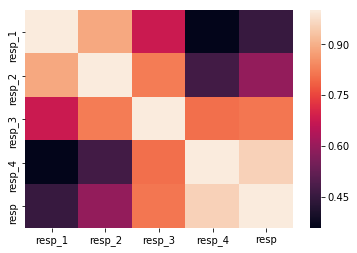

In [24]:
import seaborn as sns

sns.heatmap(train_data_[['resp_1','resp_2','resp_3','resp_4','resp']].corr())
plt.show()

### Features

In [25]:
features.head()

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,feature_1,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,feature_2,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,feature_3,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,feature_4,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [19]:
features = features.set_index('feature')

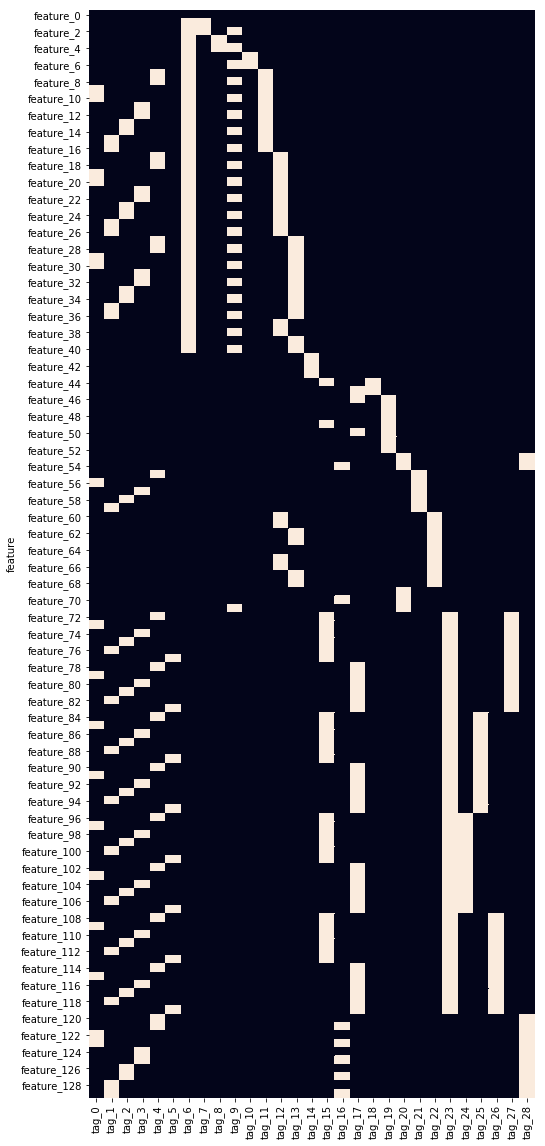

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,20))     
sns.heatmap(features*1,cbar=False)
plt.show()

### Feature Histograms

C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


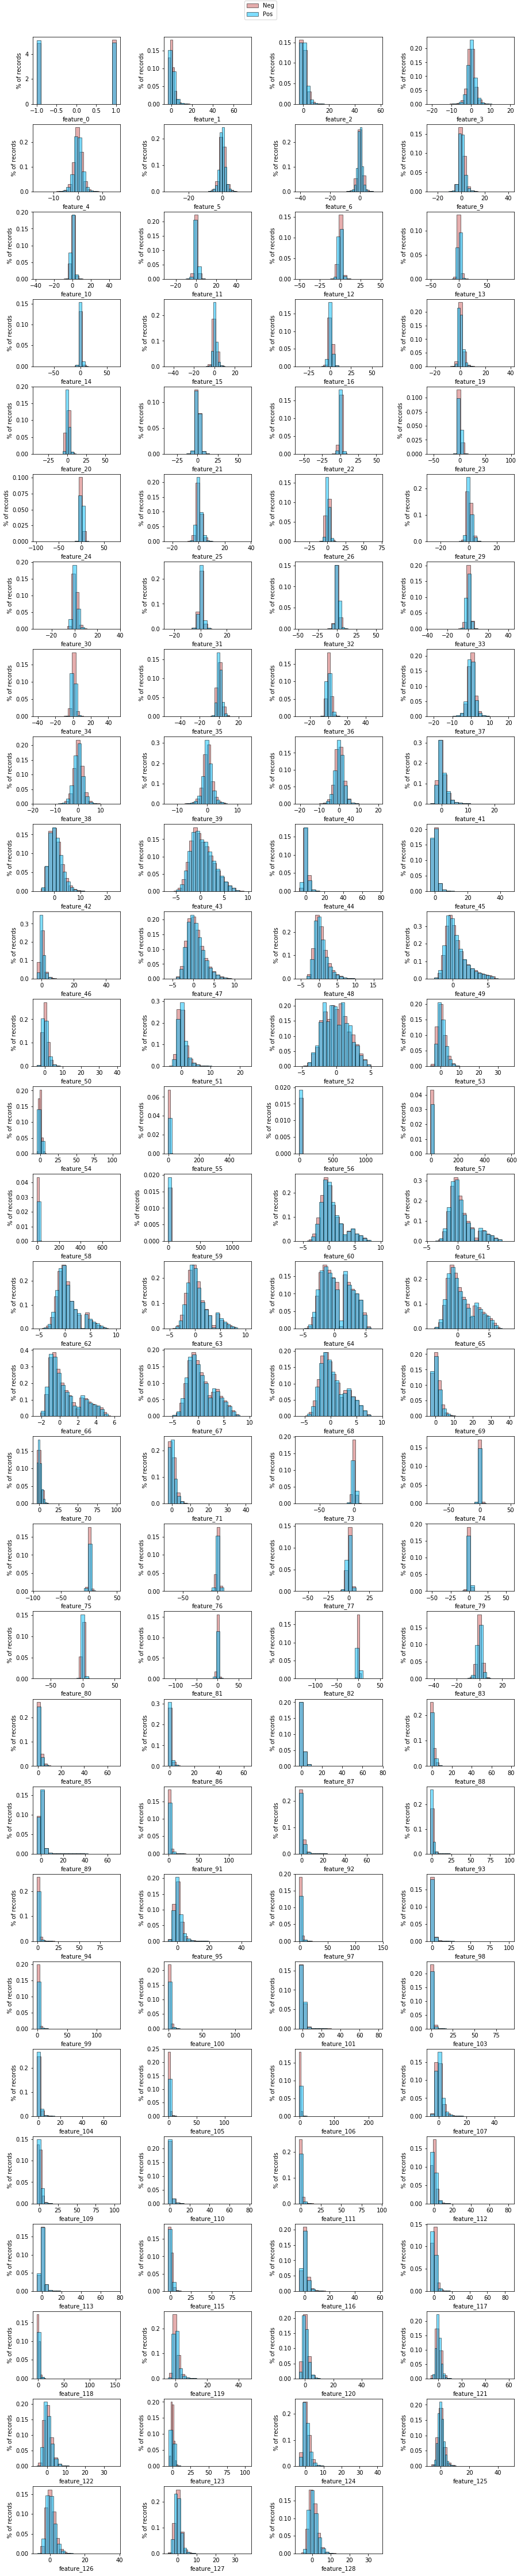

In [26]:
train_data_pos = train_data_[train_data_['resp']>0].iloc[:,7:-2]
train_data_neg = train_data_[train_data_['resp']<0].iloc[:,7:-2]

# set up figure
fig = plt.figure(figsize=(15,80))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.3)

# plot histogram for each features
for i,feature in enumerate(train_data_.iloc[:,7:-2].columns.values):
    ax = fig.add_subplot(33,4,i+1)
    
    pos_feature = train_data_pos[feature].values
    neg_feature = train_data_neg[feature].values
    
    ax.hist(neg_feature,alpha=0.5,bins=20,color='indianred',edgecolor='black',density=True,label='Neg')
    ax.hist(pos_feature,alpha=0.5,bins=20,color='deepskyblue',edgecolor='black',density=True,label='Pos')

    ax.set_xlabel(feature)
    ax.set_ylabel('% of records')   

# Add legend
h, l = ax.get_legend_handles_labels()
fig.legend(h, l, loc="upper center",borderaxespad=0.1)
    
plt.subplots_adjust(top=0.99)
plt.show()

Find and remove outliers:

In [27]:
def outlier_detector(x, k=1.5):
    #Find outliers using Tukey's fences method
    Q1 = np.nanquantile(x,0.25)
    Q3 = np.nanquantile(x,0.75)
    outliers = list(x[x<Q1-k*(Q3-Q1)].index.values)
    outliers = outliers + list(x[x>Q3+k*(Q3-Q1)].index.values)
    return outliers

In [28]:
k = 3 #outlier detection constant

In [29]:
pct_outliers = []
for feature in train_data_.iloc[:,7:-2].columns.values:
    n_outliers = len(outlier_detector(train_data_[feature],k=k))/len(train_data_[feature])*100
    pct_outliers.append(n_outliers)
pct_outliers = pd.DataFrame(pct_outliers, index=train_data_.iloc[:,7:-2].columns.values)

In [30]:
pct_outliers.rename(columns={0:'pct_outliers'}).sort_values(by='pct_outliers',ascending=False)

,pct_outliers
feature_56,3.352484
feature_86,3.217444
feature_110,3.190919
feature_74,3.082404
feature_55,2.792431
...,...
feature_65,0.000000
feature_64,0.000000
feature_52,0.000000
feature_43,0.000000


In [31]:
#Find records with outliers on any feature
outliers = []
for feature in train_data_.iloc[:,7:-2].columns.values:
    outliers = outliers + outlier_detector(train_data_[feature],k=k)
outliers = list(set(outliers))

In [32]:
#Remove outliers from dataset (from dataset that already excludes columns with too many NaNs)
train_data_clean = train_data_.loc[~train_data_.index.isin(outliers)]

In [33]:
len(train_data_clean)/len(train_data_)

0.7625650331269556

Re-plot histograms after removing outliers

C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


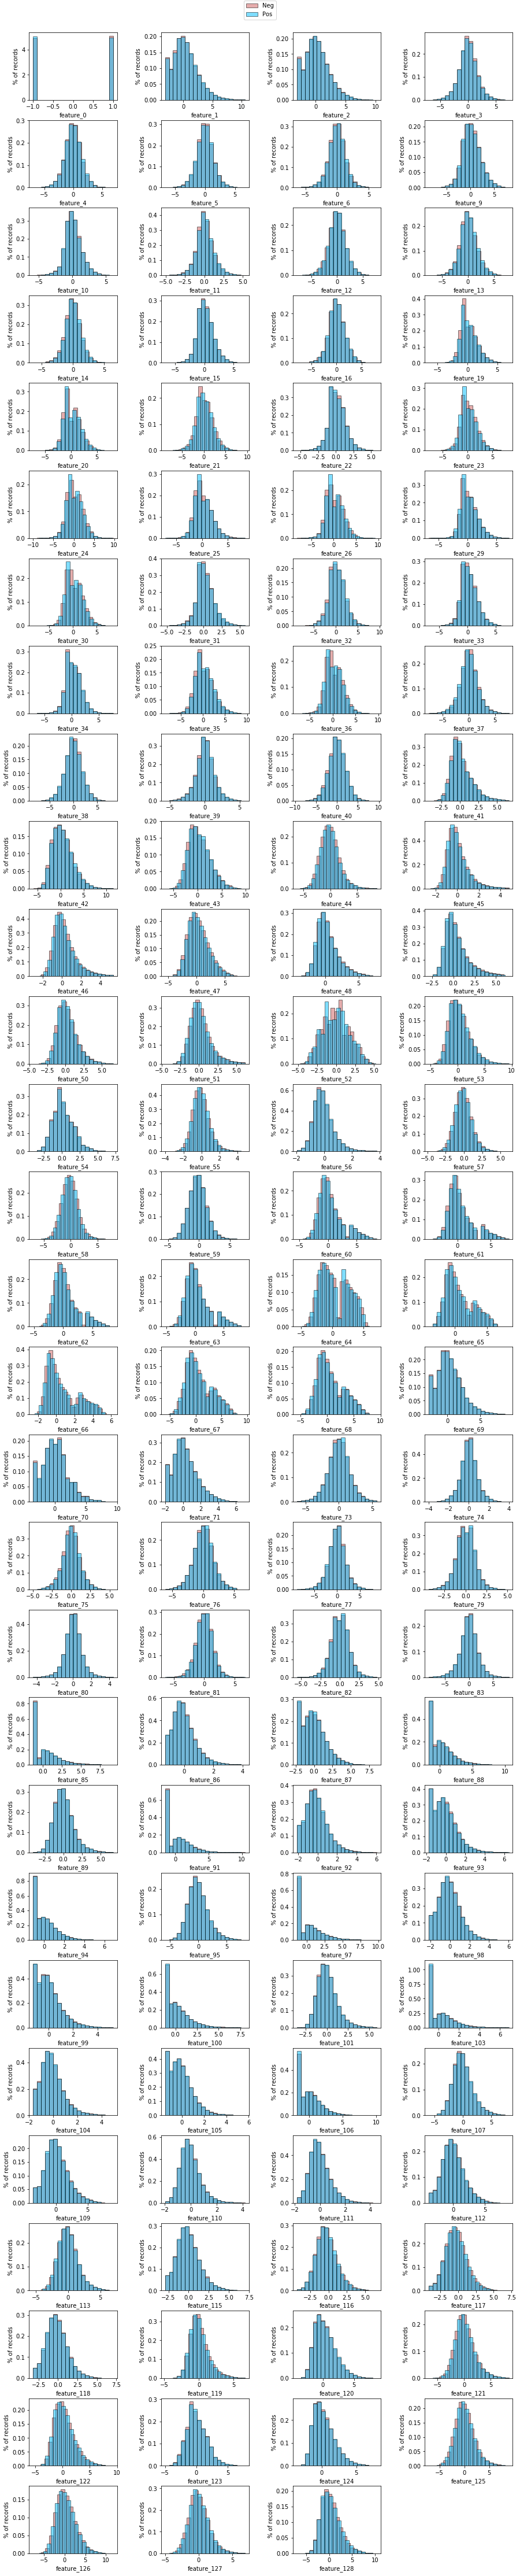

In [34]:
train_data_pos = train_data_clean[train_data_clean['resp']>0].iloc[:,7:-2]
train_data_neg = train_data_clean[train_data_clean['resp']<0].iloc[:,7:-2]

# set up figure
fig = plt.figure(figsize=(15,70))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.3)

# plot histogram for each features
for i,feature in enumerate(train_data_clean.iloc[:,7:-2].columns.values):
    ax = fig.add_subplot(29,4,i+1)
    
    pos_feature = train_data_pos[feature].values
    neg_feature = train_data_neg[feature].values
    
    ax.hist(neg_feature,alpha=0.5,bins=20,color='indianred',edgecolor='black',density=True,label='Neg')
    ax.hist(pos_feature,alpha=0.5,bins=20,color='deepskyblue',edgecolor='black',density=True,label='Pos')

    ax.set_xlabel(feature)
    ax.set_ylabel('% of records')   

# Add legend
h, l = ax.get_legend_handles_labels()
fig.legend(h, l, loc="upper center",borderaxespad=0.1)
    
plt.subplots_adjust(top=0.99)
plt.show()

In [77]:
#Split features and y/resp
X = train_data_clean.iloc[:,7:-2]
y = train_data_clean['resp']

In [78]:
#One hot encode feature_0 (categorical)
one_hot = pd.get_dummies(X['feature_0']).rename(columns={-1:'feature_0_neg',1:'feature_0_pos'})
X = X.drop(columns=['feature_0']).join(one_hot)

In [79]:
#Remove rows with NaNs
X_clean = X.dropna()
y_clean = y.loc[~y.index.isin(X[X.isnull().any(axis=1)].index.values)]
len(X_clean)/len(X)

0.9656183790279227

In [80]:
#Standardise features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_clean.iloc[:,:-2])
X_norm = scaler.transform(X_clean.iloc[:,:-2])
X_norm = pd.DataFrame(X_norm, index=X_clean.index.values, columns=X_clean.columns.values[:-2])
#Add one-hot encoded feature_0
X_norm = X_norm.merge(X_clean.iloc[:,-2:],left_index=True, right_index=True)

In [81]:
X_norm.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_9,feature_10,feature_11,feature_12,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_0_neg,feature_0_pos
count,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,...,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,1.221430e+05,122143.000000,122143.000000
mean,2.042500e-15,2.109772e-16,4.238268e-17,4.582943e-18,1.212726e-17,-3.774611e-17,-2.842297e-16,-1.685609e-16,-1.425512e-16,8.407274e-17,...,2.318231e-16,1.252974e-16,-2.830594e-16,-2.271602e-16,-1.297931e-16,-4.232996e-17,2.903197e-18,-2.153311e-16,0.497065,0.502935
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.499993,0.499993
min,-1.601588e+00,-1.632306e+00,-4.186923e+00,-4.542435e+00,-4.550973e+00,-4.530523e+00,-4.614428e+00,-4.711720e+00,-4.510366e+00,-4.659931e+00,...,-3.625802e+00,-3.016153e+00,-3.133521e+00,-2.477330e+00,-3.773099e+00,-3.392988e+00,-3.434953e+00,-3.471465e+00,0.000000,0.000000
25%,-6.819364e-01,-6.873833e-01,-6.040602e-01,-6.137467e-01,-5.929402e-01,-5.927302e-01,-6.725657e-01,-6.307147e-01,-5.826585e-01,-6.210146e-01,...,-6.674075e-01,-7.251120e-01,-6.637002e-01,-7.467544e-01,-6.636809e-01,-7.210400e-01,-6.566876e-01,-7.230878e-01,0.000000,0.000000
50%,-1.042752e-01,-8.991367e-02,-7.495281e-03,-2.706046e-03,-7.875658e-03,1.821674e-03,-7.049761e-02,-7.381632e-02,-4.964380e-02,-6.255396e-03,...,-1.062827e-01,-1.389011e-01,-1.212837e-01,-1.701603e-01,-7.487464e-02,-1.095934e-01,-9.027114e-02,-1.245076e-01,0.000000,1.000000
75%,5.676649e-01,5.886766e-01,6.039886e-01,6.195463e-01,5.993752e-01,5.995662e-01,6.125513e-01,5.821621e-01,5.529361e-01,6.159710e-01,...,5.531266e-01,5.616651e-01,6.299073e-01,5.713692e-01,5.884583e-01,6.068062e-01,5.911675e-01,5.821478e-01,1.000000,1.000000
max,4.703997e+00,4.829808e+00,4.386395e+00,4.584695e+00,4.589918e+00,4.509996e+00,4.021728e+00,4.718883e+00,4.567704e+00,4.639486e+00,...,4.429071e+00,4.710389e+00,4.862209e+00,4.833690e+00,4.715917e+00,4.870577e+00,4.708300e+00,4.767953e+00,1.000000,1.000000


In [82]:
len(X_norm)/len(train_data)

0.610715

Pairwise correlation with resp:

In [83]:
corr = pd.DataFrame(X_norm.corrwith(y)).rename(columns={0:'corr'})
corr['abs_corr'] = abs(corr['corr'])
corr = corr.sort_values(by='abs_corr', ascending=False)
corr

,corr,abs_corr
feature_31,0.032035,0.032035
feature_33,0.027103,0.027103
feature_37,-0.022635,0.022635
feature_11,0.022224,0.022224
feature_122,0.020058,0.020058
...,...,...
feature_121,0.000413,0.000413
feature_46,-0.000357,0.000357
feature_48,-0.000350,0.000350
feature_116,-0.000268,0.000268


## Prediction

Split data into training and test set:

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm,y_clean,test_size=0.25, random_state=42)

### Simple ML Models

In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
model.score(X_test,y_test)

0.002956496369336037

In [88]:
from sklearn.svm import SVR
model = SVR().fit(X_norm, y_clean)
model.score(X_norm,y_clean)

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.6587582011091444

### Neural Nets

In [114]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                3744      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 3,777
Trainable params: 3,777
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [116]:
from keras.callbacks import EarlyStopping

batch_size = 64
epochs = 50
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test), 
                 callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Train on 91607 samples, validate on 30536 samples
Epoch 1/50
91607/91607 [==============================] - 3s 38us/step - loss: 0.0251 - val_loss: 0.0034
Epoch 2/50
91607/91607 [==============================] - 3s 31us/step - loss: 0.0020 - val_loss: 0.0013
Epoch 3/50
91607/91607 [==============================] - 4s 45us/step - loss: 0.0010 - val_loss: 9.2374e-04
Epoch 4/50
91607/91607 [==============================] - 2s 23us/step - loss: 8.5171e-04 - val_loss: 7.9574e-04
Epoch 5/50
91607/91607 [==============================] - 2s 24us/step - loss: 7.9669e-04 - val_loss: 6.7284e-04
Epoch 6/50
91607/91607 [==============================] - 2s 22us/step - loss: 7.4749e-04 - val_loss: 6.4972e-04
Epoch 7/50
91607/91607 [==============================] - 2s 27us/step - loss: 7.0999e-04 - val_loss: 6.8304e-04
Epoch 8/50
91607/91607 [==============================] - 2s 26us/step - loss: 6.7856e-04 - val_loss: 6.3033e-04
Epoch 9/50
91607/91607 [==============================] - 2s 22us/

In [117]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

-0.0341684838797347